In [12]:
import pandas as pd 
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Logistic Regression

In [13]:
def fitLRModel(inputFile, outputFile=None):
    # Load your dataset
    df = pd.read_csv(inputFile)

    # Separate features and target
    features = df.drop('target', axis=1)
    target = df['target']

    # Identify categorical and numerical columns
    categorical_cols = features.select_dtypes(include=['object', 'category']).columns
    numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns

    # Create a column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(), categorical_cols)
        ])

    # Create the pipeline with Logistic Regression
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', LogisticRegression(random_state=42))
    ])

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.2, random_state=42)

    # Fit the model
    model_pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model_pipeline.predict(X_test)
    print(f'The accuracy for {inputFile} is {accuracy_score(y_test, y_pred)}')
    
    if outputFile:
        with open(outputFile, 'wb') as file:
            pickle.dump(model_pipeline, file)

In [14]:
fitLRModel('./data/processed/heart_diease.csv')

The accuracy for ./data/processed/heart_diease.csv is 0.8478260869565217


## Random Forest

In [15]:
def fitRFModel(inputFile, outputFile=None):
    # Load your dataset
    df = pd.read_csv(inputFile)

    # Separate features and target
    features = df.drop('target', axis=1)
    target = df['target']

    # Identify categorical and numerical columns
    categorical_cols = features.select_dtypes(include=['object', 'category']).columns
    numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns

    # Create a column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(), categorical_cols)
        ])

    # Create the pipeline
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', RandomForestClassifier(random_state=42))
    ])

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.2, random_state=42)

    # Fit the model
    model_pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model_pipeline.predict(X_test)
    print(f'The accuracy for {inputFile} is {accuracy_score(y_test, y_pred)}')
    
    if outputFile:
        with open(outputFile, 'wb') as file:
            pickle.dump(model_pipeline, file)

In [18]:
fitLRModel('./data/processed/heart_diease.csv', './model_checkpoints/heart_disease_rf.pkl')

The accuracy for ./data/processed/heart_diease.csv is 0.8478260869565217


## Clustering and Random Forest

In [ ]:
def fitModelWithClustering(inputFile, n_clusters, outputFile=None):
    # Load your dataset
    df = pd.read_csv(inputFile)

    # Separate features and target
    features = df.drop('target', axis=1)
    target = df['target']

    # Identify categorical and numerical columns
    categorical_cols = features.select_dtypes(include=['object', 'category']).columns
    numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns

    # Create a column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(), categorical_cols)
        ])

    # Preprocess input data
    X_processed = preprocessor.fit_transform(features)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_processed)

    # Add cluster information as a feature
    features_clustered = pd.concat([features, pd.Series(clusters, name='cluster')], axis=1)

    # Create the pipeline with RandomForestClassifier
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', RandomForestClassifier(random_state=42))
    ])

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        features_clustered, target, test_size=0.2, random_state=42)

    # Fit the model
    model_pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model_pipeline.predict(X_test)
    print(f'The accuracy for {inputFile} is {accuracy_score(y_test, y_pred)}')

    if outputFile:
        with open(outputFile, 'wb') as file:
            pickle.dump(model_pipeline, file)


In [ ]:
fitModelWithClustering('./data/processed/heart_diease.csv', 2)

/Users/subhan/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The accuracy for ./data/processed/heart_diease.csv is 0.8260869565217391


In [ ]:
def fitModelWithClustering(inputFile, outputFile, n_clusters):
    # Load your dataset
    df = pd.read_csv(inputFile)

    # Separate features and target
    features = df.drop('target', axis=1)
    target = df['target']

    # Identify categorical and numerical columns
    categorical_cols = features.select_dtypes(include=['object', 'category']).columns
    numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns

    # Create a column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(), categorical_cols)
        ])

    # Create the pipeline with K-means clustering
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('cluster', KMeans(n_clusters=n_clusters, random_state=42)),  # Add K-means clustering step
        ('model', RandomForestClassifier(random_state=42))
    ])

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.2, random_state=42)

    # Fit the model
    model_pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model_pipeline.predict(X_test)
    print(f'The accuracy for {inputFile} is {accuracy_score(y_test, y_pred)}')

    with open(outputFile, 'wb') as file:
        pickle.dump(model_pipeline, file)


In [ ]:
# fitModelWithClustering('heart_clean.csv', 'clustering_model.pkl', n_clusters=2)

## Performing PCA

In [ ]:
def fitModelWithPCA(inputFile, outputFile):
    # Load your dataset
    df = pd.read_csv(inputFile)

    # Separate features and target
    features = df.drop('target', axis=1)
    target = df['target']

    # Identify categorical and numerical columns
    categorical_cols = features.select_dtypes(include=['object', 'category']).columns
    numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns

    # Create a column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ],
        remainder='passthrough'  # Pass through any columns not specified
    )

    # Create the pipeline with preprocessing and PCA
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=2)),  # Use PCA for dimensionality reduction
    ])

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.2, random_state=42)

    # Fit the model
    X_train_pca = model_pipeline.named_steps['pca'].fit_transform(model_pipeline.named_steps['preprocessor'].fit_transform(X_train))

    # Plot clusters based on the target variable
    visualize_clusters(X_train_pca, y_train, title=f'Clusters for {inputFile}')

    with open(outputFile, 'wb') as file:
        pickle.dump(model_pipeline, file)

def visualize_clusters(X, target, title):
    # Plot clusters with colors based on the target variable
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=target, cmap='viridis', edgecolor='k', marker='o', alpha=0.7)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

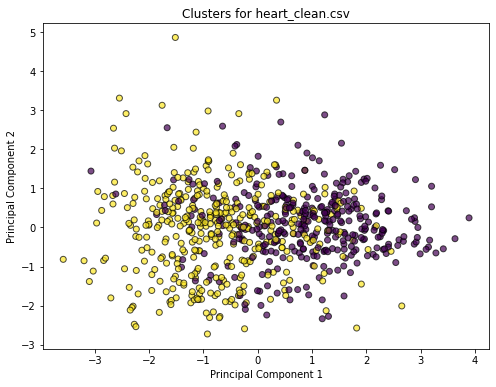

In [ ]:
# Example usage
fitModelWithPCA('heart_clean.csv', 'pca_model.pkl')

## PCA for Dimensionality Reduction and Kmeans for Clustering

In [ ]:
def fitModelWithPCAAndKMeans(inputFile, outputFile, n_clusters):
    # Load your dataset
    df = pd.read_csv(inputFile)

    # Separate features and target
    features = df.drop('target', axis=1)
    target = df['target']

    # Identify categorical and numerical columns
    categorical_cols = features.select_dtypes(include=['object', 'category']).columns
    numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns

    # Create a column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ],
        remainder='passthrough'  # Pass through any columns not specified
    )

    # Create the pipeline with preprocessing, PCA, and KMeans clustering
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=2)),  # Use PCA for dimensionality reduction
        ('cluster', KMeans(n_clusters=n_clusters, random_state=42)),
    ])

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.2, random_state=42)

    # Fit the model
    X_train_pca = model_pipeline.named_steps['pca'].fit_transform(model_pipeline.named_steps['preprocessor'].fit_transform(X_train))
    model_pipeline.named_steps['cluster'].fit(X_train_pca)

    # Predict clusters on the test set
    X_test_pca = model_pipeline.named_steps['pca'].transform(model_pipeline.named_steps['preprocessor'].transform(X_test))
    clusters = model_pipeline.named_steps['cluster'].predict(X_test_pca)

    # Plot clusters based on the target variable
    visualize_clusters(X_test_pca, clusters, title=f'Clusters for {inputFile}')

    with open(outputFile, 'wb') as file:
        pickle.dump(model_pipeline, file)

def visualize_clusters(X, clusters, title):
    # Plot clusters with colors based on the cluster assignment
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', edgecolor='k', marker='o', alpha=0.7)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

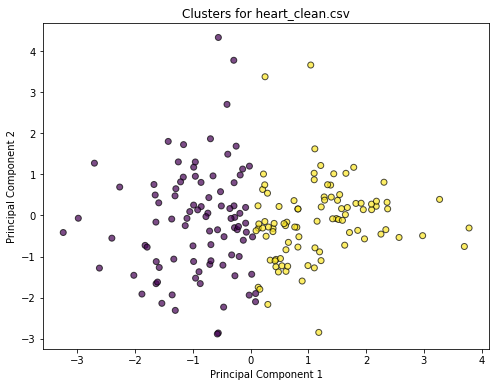

In [ ]:
# Example usage
fitModelWithPCAAndKMeans('heart_clean.csv', 'pca_kmeans.pkl', n_clusters=2)
